In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings 
warnings.filterwarnings( "ignore")
import statsmodels.formula.api as sm
import scipy.stats as stats
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix


In [2]:
data = pd.read_excel("Election_Data.xlsx",sheet_name ="Sheet1")
data

,**Data Dictionary**
0,1. vote: Party choice: Conservative or Labour
1,2. age: in years
2,3. economic.cond.national: Assessment of curre...
3,4. economic.cond.household: Assessment of curr...
4,"5. Blair: Assessment of the Labour leader, 1 t..."
5,6. Hague: Assessment of the Conservative leade...
6,7. Europe: an 11-point scale that measures res...
7,8. political.knowledge: Knowledge of parties' ...
8,9. gender: female or male.


In [3]:
ele_df = pd.read_excel("Election_Data.xlsx",sheet_name ="Election_Dataset_Two Classes")
ele_df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
ele_df = ele_df.drop("Unnamed: 0",axis = 1)

In [5]:
ele_df.shape

(1525, 9)

In [6]:
ele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [7]:
ele_df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [9]:
ele_df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525,NaN,NaN,NaN,54.1823,15.7112,24,41,53,67,93
economic.cond.national,1525,NaN,NaN,NaN,3.2459,0.880969,1,3,3,4,5
economic.cond.household,1525,NaN,NaN,NaN,3.14033,0.929951,1,3,3,4,5
Blair,1525,NaN,NaN,NaN,3.33443,1.17482,1,2,4,4,5
Hague,1525,NaN,NaN,NaN,2.74689,1.2307,1,2,2,4,5
Europe,1525,NaN,NaN,NaN,6.72852,3.29754,1,4,6,10,11
political.knowledge,1525,NaN,NaN,NaN,1.5423,1.08331,0,0,2,2,3
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
ele_df.skew()

age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

In [9]:
dups = ele_df.duplicated().sum()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 8


In [10]:
print('Before',ele_df.shape)
ele_df.drop_duplicates(inplace=True) 
print('After',ele_df.shape)

Before (1525, 9)
After (1517, 9)


In [11]:
for column in ele_df.columns:
    if ele_df[column].dtype == 'object':
        print(column.upper(),': ',ele_df[column].nunique())
        print(ele_df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




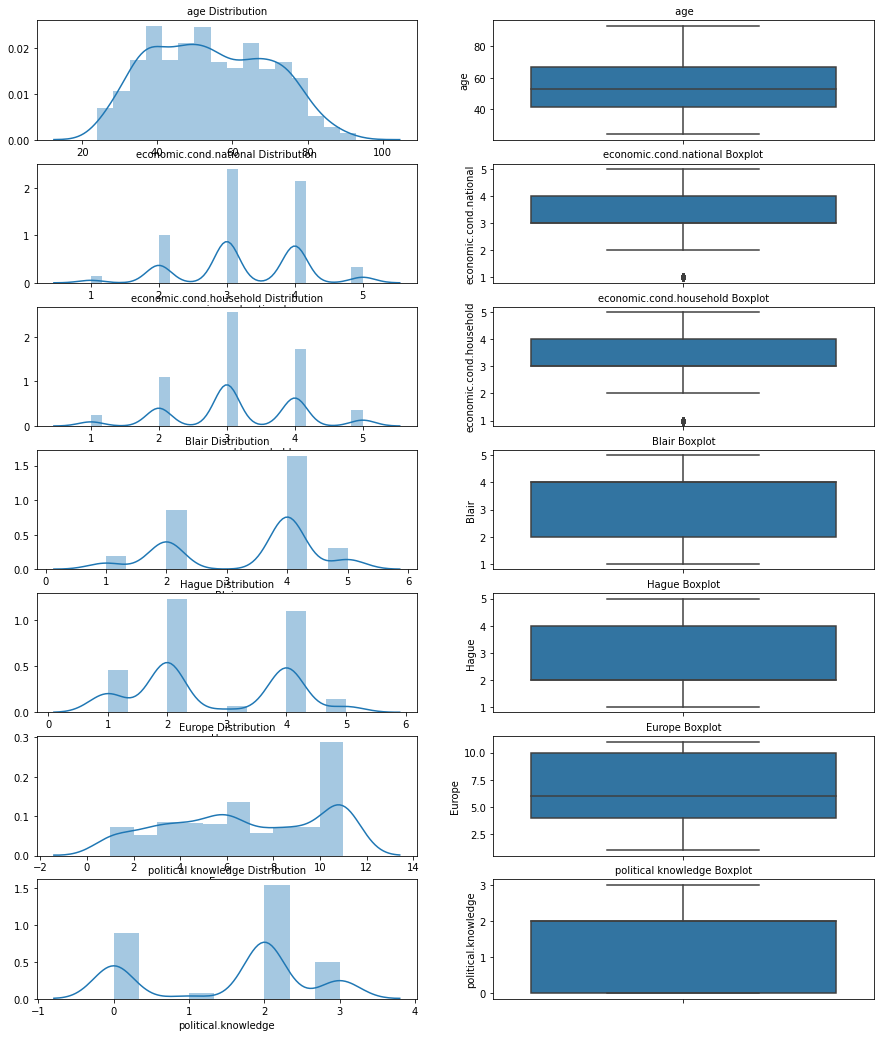

In [16]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(15,18)

a = sns.distplot(ele_df['age'] , ax=axes[0][0])
a.set_title("age Distribution",fontsize=10)
a = sns.boxplot(ele_df['age'] , orient = "v" , ax=axes[0][1])
a.set_title(" age",fontsize=10)

a = sns.distplot(ele_df['economic.cond.national'] , ax=axes[1][0])
a.set_title("economic.cond.national Distribution",fontsize=10)
a = sns.boxplot(ele_df['economic.cond.national'] , orient = "v" , ax=axes[1][1])
a.set_title("economic.cond.national Boxplot",fontsize=10)


a = sns.distplot(ele_df['economic.cond.household'] , ax=axes[2][0])
a.set_title("economic.cond.household Distribution",fontsize=10)
a = sns.boxplot(ele_df['economic.cond.household'] , orient = "v" , ax=axes[2][1])
a.set_title("economic.cond.household Boxplot",fontsize=10)


a = sns.distplot(ele_df['Blair'] , ax=axes[3][0])
a.set_title("Blair Distribution",fontsize=10)
a = sns.boxplot(ele_df['Blair'] , orient = "v" , ax=axes[3][1])
a.set_title("Blair Boxplot",fontsize=10)


a = sns.distplot(ele_df['Hague'] , ax=axes[4][0])
a.set_title("Hague Distribution",fontsize=10)
a = sns.boxplot(ele_df['Hague'] , orient = "v" , ax=axes[4][1])
a.set_title("Hague Boxplot",fontsize=10)


a = sns.distplot(ele_df['Europe'] , ax=axes[5][0])
a.set_title("Europe Distribution",fontsize=10)
a = sns.boxplot(ele_df['Europe'] , orient = "v" , ax=axes[5][1])
a.set_title("Europe Boxplot",fontsize=10)


a = sns.distplot(ele_df['political.knowledge'] , ax=axes[6][0])
a.set_title("political knowledge Distribution",fontsize=10)
a = sns.boxplot(ele_df['political.knowledge'] , orient = "v" , ax=axes[6][1])
a.set_title("political knowledge Boxplot",fontsize=10)

plt.show()


In [ ]:
# only age is normally distributed others are multimodel skewness seen
# only economic.cond.national and economic.cond.household have outliers

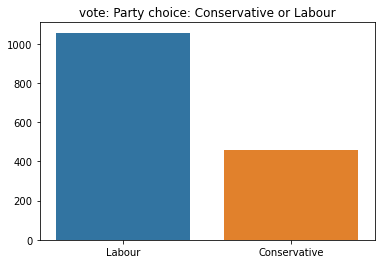

Labour          0.69677
Conservative    0.30323
Name: vote, dtype: float64


In [13]:
sns.barplot(ele_df.vote.value_counts().index,ele_df.vote.value_counts().values)
plt.title("vote: Party choice: Conservative or Labour")
plt.show()
print(ele_df.vote.value_counts(normalize=True))

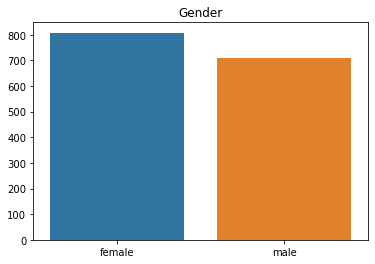

female    0.53263
male      0.46737
Name: gender, dtype: float64


In [14]:
sns.barplot(ele_df.gender.value_counts().index,ele_df.gender.value_counts().values)
plt.title("Gender")
plt.show()
print(ele_df.gender.value_counts(normalize=True))

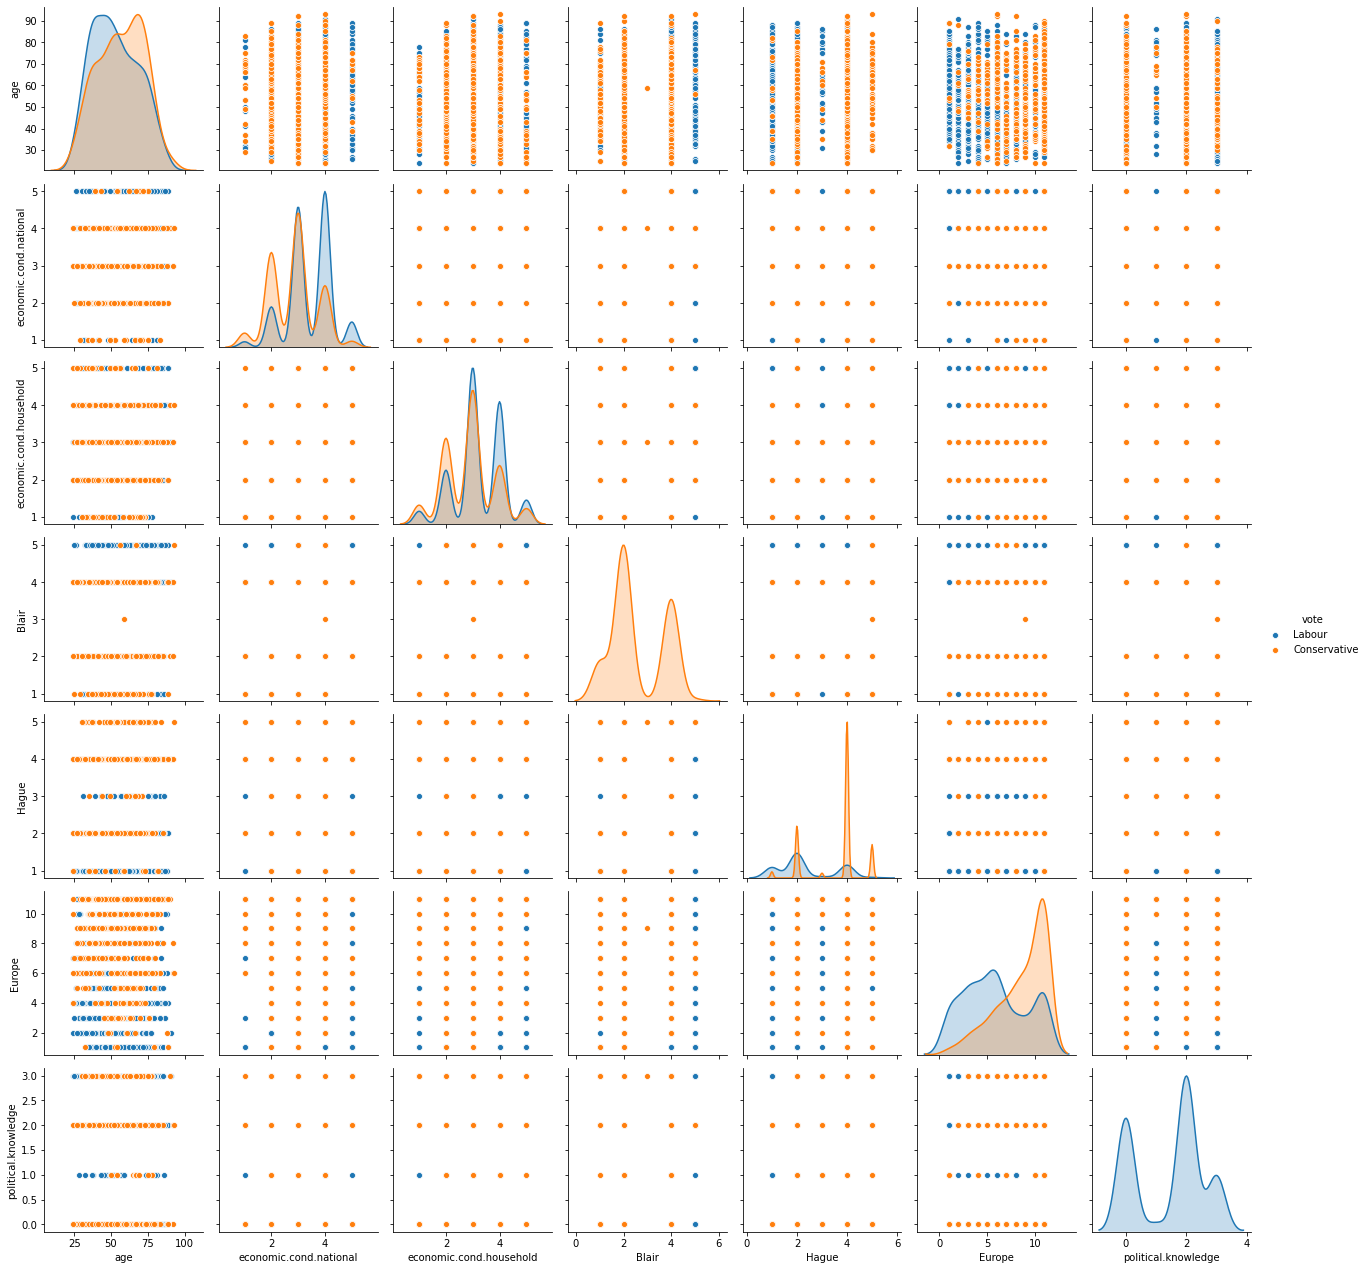

In [15]:
sns.pairplot(ele_df,hue="vote")

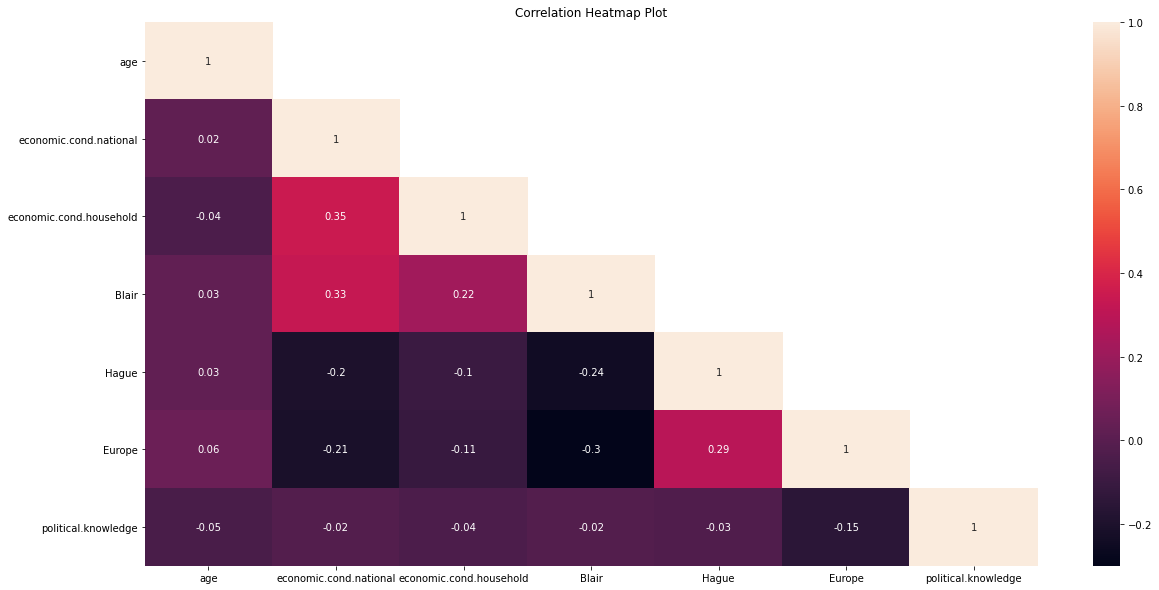

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(round(ele_df.corr(),2), annot=True,mask=np.triu(ele_df.corr(),+1));
plt.title('Correlation Heatmap Plot')
plt.show()

In [16]:
ele_df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

Text(0.5, 1.0, 'vote vs economic.cond.national')

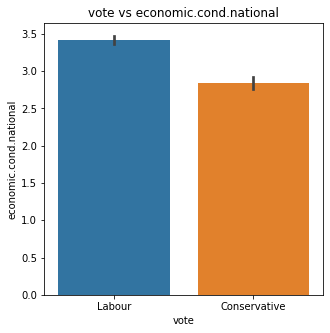

In [17]:
#Bivariate Analysis

plt.figure(figsize=(5,5))
ax = sns.barplot(x='vote', y='economic.cond.national',data=ele_df)
plt.title("vote vs economic.cond.national")

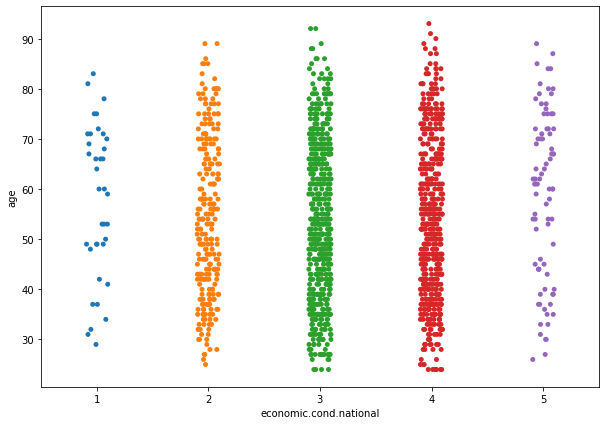

In [18]:
plt.figure(figsize=(10,7))
sns.stripplot(ele_df["economic.cond.national"], ele_df["age"], jitter=True) 
plt.show()


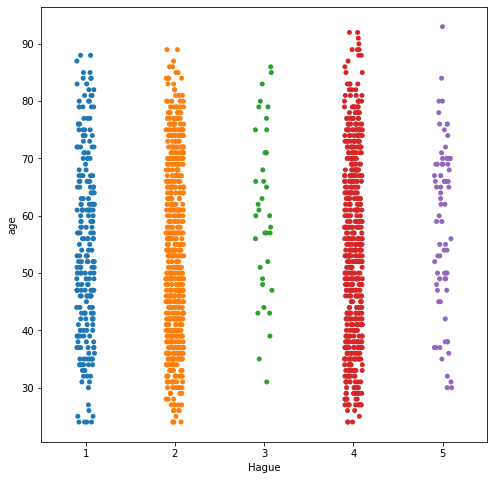

In [19]:
plt.figure(figsize=(8,8))
sns.stripplot(ele_df["Hague"], ele_df['age'], jitter=True) 
plt.show()

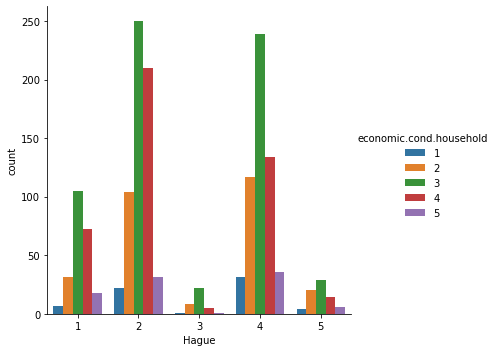

In [20]:
#Catplot Analysis - Hague(count) on economic.cond.household
sns.catplot(x="Hague", kind="count",hue='economic.cond.household',data=ele_df)


In [ ]:
# 

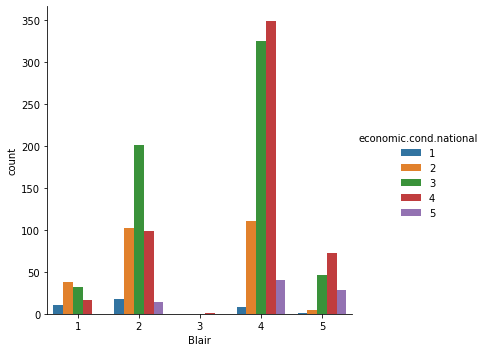

In [21]:
#Catplot Analysis - Blair(count) on economic.cond.national
sns.catplot(x="Blair", kind="count",hue='economic.cond.national',data=ele_df)


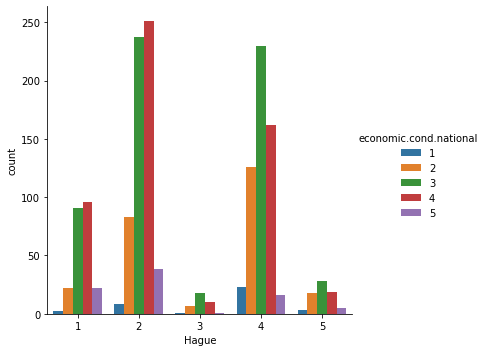

In [22]:
#Catplot Analysis - Hague(count) on economic.cond.national
sns.catplot(x="Hague", kind="count",hue='economic.cond.national',data=ele_df)


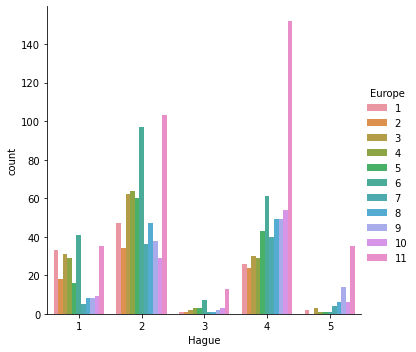

In [23]:
#Catplot Analysis - Hague(count) on Europe
sns.catplot(x="Hague", kind="count",hue='Europe',data=ele_df)


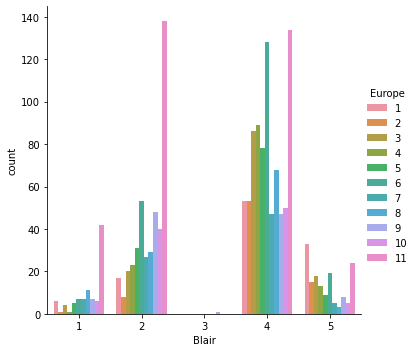

In [24]:
sns.catplot(x="Blair", kind="count",hue='Europe',data=ele_df)

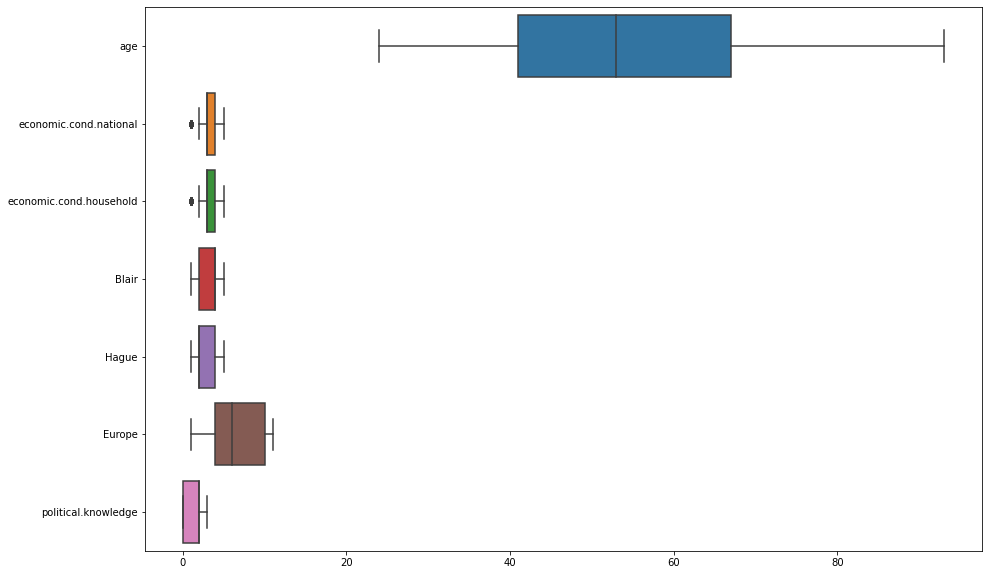

In [25]:
plt.subplots(figsize=(15,10))

sns.boxplot(data=ele_df,orient="h")
plt.show()

In [12]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [13]:
dtypes=ele_df.dtypes[(ele_df.dtypes!= 'object')].index
for column in ele_df[dtypes].columns:
    lr,ur=remove_outlier(ele_df[column])
    ele_df[column]=np.where(ele_df[column]>ur,ur,ele_df[column])
    ele_df[column]=np.where(ele_df[column]<lr,lr,ele_df[column])


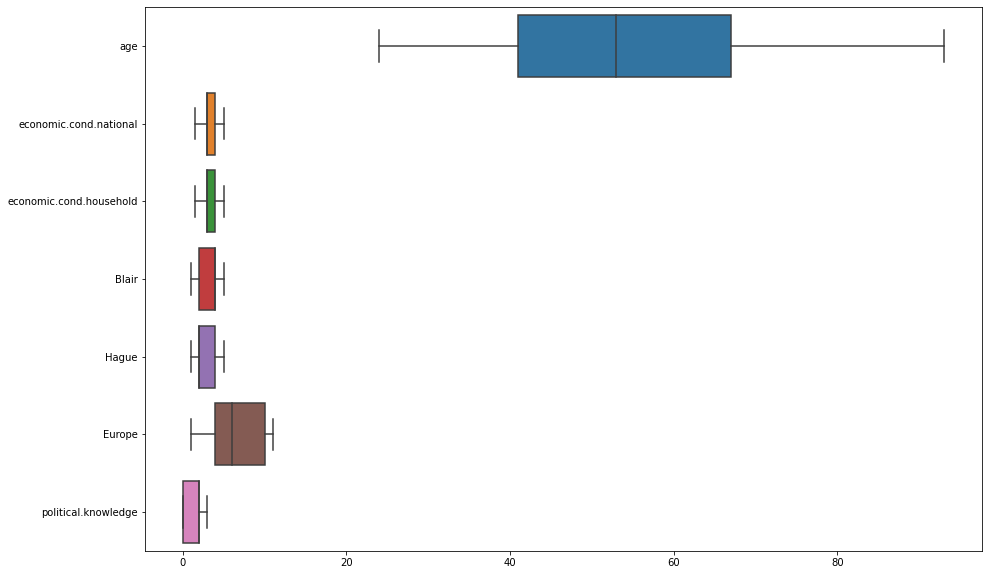

In [14]:
plt.subplots(figsize=(15,10))

sns.boxplot(data=ele_df,orient="h")
plt.show()

In [ ]:
# All outliers are removed for further analysis

In [15]:
ele_df['age'] = ele_df['age'].astype('int64')
ele_df['economic.cond.national'] = ele_df['economic.cond.national'].astype('int64')
ele_df['economic.cond.household'] = ele_df['economic.cond.household'].astype('int64')
ele_df['Blair'] = ele_df['Blair'].astype('int64')
ele_df['Hague'] = ele_df['Hague'].astype('int64')
ele_df['Europe'] = ele_df['Europe'].astype('int64')
ele_df['political.knowledge'] = ele_df['political.knowledge'].astype('int64')

In [16]:
display(ele_df.dtypes)

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [17]:
#Converting Object variables to categorical variables:
for feature in ele_df.columns: 
    if ele_df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(ele_df[feature].unique()))
        print(pd.Categorical(ele_df[feature].unique()).codes)
        ele_df[feature] = pd.Categorical(ele_df[feature]).codes




feature: vote
[Labour, Conservative]
Categories (2, object): [Conservative, Labour]
[1 0]


feature: gender
[female, male]
Categories (2, object): [female, male]
[0 1]


In [18]:
ele_df.vote.value_counts(normalize=True)

1    0.69677
0    0.30323
Name: vote, dtype: float64

In [19]:
ele_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int8 
 1   age                      1517 non-null   int64
 2   economic.cond.national   1517 non-null   int64
 3   economic.cond.household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political.knowledge      1517 non-null   int64
 8   gender                   1517 non-null   int8 
dtypes: int64(7), int8(2)
memory usage: 97.8 KB


In [20]:
# Converting int8 to int64 variables
ele_df['vote'] = ele_df['vote'].astype('int64')
ele_df['gender'] = ele_df['gender'].astype('int64')


In [21]:
ele_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int64
 1   age                      1517 non-null   int64
 2   economic.cond.national   1517 non-null   int64
 3   economic.cond.household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political.knowledge      1517 non-null   int64
 8   gender                   1517 non-null   int64
dtypes: int64(9)
memory usage: 118.5 KB


In [22]:
ele_df_copy = ele_df.copy()
ele_df_copy.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


**Train-Test Split**

In [23]:
X = ele_df.drop('vote', axis=1)

y = ele_df[['vote']]

In [24]:
#Applying Z score scaling on Variable X - To be used in specific algorithms 
age1=['age']
X_scaled=X.copy()
y_new = y.copy()
X_scaled[age1] = X_scaled[age1].apply(lambda x:(x-x.mean()) / (x.std()))


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [26]:
print('The training set for the independent variables:',X_train.shape)
print('The training set for the dependent variable:',y_train.shape)
print('The test set for the independent variables:',X_test.shape)
print('The test set for the dependent variable:',y_test.shape)

The training set for the independent variables: (1061, 8)
The training set for the dependent variable: (1061, 1)
The test set for the independent variables: (456, 8)
The test set for the dependent variable: (456, 1)


In [27]:
X_trains, X_tests, y_trains, y_tests = train_test_split(X_scaled, y_new, test_size=0.30 , random_state=1)

In [28]:
print('The training set for the independent variables:',X_trains.shape)
print('The training set for the dependent variable:',y_trains.shape)
print('The test set for the independent variables:',X_tests.shape)
print('The test set for the dependent variable:',y_tests.shape)

The training set for the independent variables: (1061, 8)
The training set for the dependent variable: (1061, 1)
The test set for the independent variables: (456, 8)
The test set for the dependent variable: (456, 1)


In [30]:
# Fit the Logistic Regression model
modellr = LogisticRegression()
modellr.fit(X_train, y_train)

LogisticRegression()

In [31]:
ytrain_predictlr = modellr.predict(X_train)
ytest_predictlr = modellr.predict(X_test)

In [32]:
ytest_predict_problr=modellr.predict_proba(X_test)
pd.DataFrame(ytest_predict_problr).head()

,0,1
0,0.426821,0.573179
1,0.146108,0.853892
2,0.005677,0.994323
3,0.845837,0.154163
4,0.060710,0.939290


In [33]:
modellr.score(X_train, y_train)

0.8350612629594723

In [34]:
modellr.score(X_test, y_test)

0.8267543859649122

In [35]:
grid1={'penalty':['l2','none'],
      'solver':['newton-cg',  'saga'],
      'max_iter':[10000,100000],
      'tol':[0.0001,0.001]
     }

In [36]:
modellr1 = LogisticRegression()

In [39]:
grid_searchlr = GridSearchCV(estimator = modellr1, param_grid = grid1, cv = 3,n_jobs=-1,scoring='accuracy')

In [40]:
grid_searchlr.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [10000, 100000], 'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'saga'],
                         'tol': [0.0001, 0.001]},
             scoring='accuracy')

In [41]:
print(grid_searchlr.best_params_,'\n')
print(grid_searchlr.best_estimator_)

{'max_iter': 10000, 'penalty': 'none', 'solver': 'saga', 'tol': 0.001} 

LogisticRegression(max_iter=10000, penalty='none', solver='saga', tol=0.001)


In [42]:
best_modellr = grid_searchlr.best_estimator_

In [43]:
ytrain_predictlr = best_modellr.predict(X_train)
ytest_predictlr = best_modellr.predict(X_test)

In [44]:
ytrain_predict_problr=best_modellr.predict_proba(X_train)
pd.DataFrame(ytrain_predict_problr).head()

,0,1
0,0.936817,0.063183
1,0.109114,0.890886
2,0.248982,0.751018
3,0.128807,0.871193
4,0.019644,0.980356


In [45]:
ytest_predict_problr=best_modellr.predict_proba(X_test)
pd.DataFrame(ytest_predict_problr).head()

,0,1
0,0.428267,0.571733
1,0.177206,0.822794
2,0.004406,0.995594
3,0.852148,0.147852
4,0.064081,0.935919


In [46]:
# Accuracy - Training Data
# Training Accuracy
accuracy_lr_train= best_modellr.score(X_train, y_train)
accuracy_lr_train


0.8294062205466541

In [47]:
accuracy_lr_test= best_modellr.score(X_test, y_test)
accuracy_lr_test


0.8201754385964912

In [48]:
#Finding the Intercept of the Final Model 
print("The intercept for the model is :",best_modellr.intercept_)



The intercept for the model is : [0.20426418]


In [49]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, best_modellr.coef_[0][idx]))

The coefficient for age is -0.006854878831463495
The coefficient for economic.cond.national is 0.7135968821433287
The coefficient for economic.cond.household is 0.18721149727710462
The coefficient for Blair is 0.6703768181600023
The coefficient for Hague is -0.745697729263501
The coefficient for Europe is -0.183618187995406
The coefficient for political.knowledge is -0.25573979170938455
The coefficient for gender is 0.15672831586338198


Feature: 0, Score: -0.00685
Feature: 1, Score: 0.71360
Feature: 2, Score: 0.18721
Feature: 3, Score: 0.67038
Feature: 4, Score: -0.74570
Feature: 5, Score: -0.18362
Feature: 6, Score: -0.25574
Feature: 7, Score: 0.15673


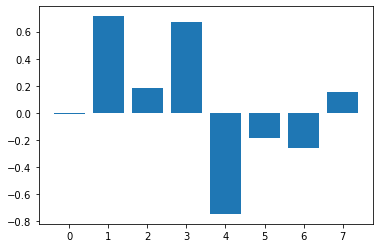

In [50]:
#Feature Importance Graphs
importance = best_modellr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [51]:
# concatenate X and y into a single dataframe
data_train1 = pd.concat([X_train, y_train], axis=1)
data_test1=pd.concat([X_test,y_test],axis=1)
data_train1.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,vote
991,34,2,4,1,4,11,2,0,0
1274,40,4,3,4,4,6,0,1,1
649,61,4,3,4,4,7,2,0,0
677,47,3,3,4,2,11,0,1,1
538,44,5,3,4,2,8,0,1,1


In [54]:
# Fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_trains, y_trains)

LogisticRegression()

In [56]:
ytrain_predict = model.predict(X_trains)
ytest_predict = model.predict(X_tests)

In [57]:
ytest_predict_prob=model.predict_proba(X_tests)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.423173,0.576827
1,0.150182,0.849818
2,0.007374,0.992626
3,0.833312,0.166688
4,0.070138,0.929862


In [58]:
# Accuracy - Training Data
model.score(X_trains, y_trains)

0.8312912346842601

In [59]:
model.score(X_tests, y_tests)

0.8355263157894737

In [164]:
grid={'penalty':['l2'],
      'solver':['saga'],
      'max_iter':[1000,100],
      'tol':[0.00001,0.001]
     }


In [165]:
model1 = LogisticRegression()

In [166]:
grid_search = GridSearchCV(estimator = model1, param_grid = grid, cv = 7,n_jobs=-1,scoring='accuracy')

In [167]:
grid_search.fit(X_trains, y_trains)

GridSearchCV(cv=7, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [1000, 100], 'penalty': ['l2'],
                         'solver': ['saga'], 'tol': [1e-05, 0.001]},
             scoring='accuracy')

In [168]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga', 'tol': 1e-05} 

LogisticRegression(max_iter=1000, solver='saga', tol=1e-05)


In [169]:
best_model = grid_search.best_estimator_

In [170]:
ytrain_predictlr1 = best_model.predict(X_trains)
ytest_predictlr1 = best_model.predict(X_tests)

In [171]:
# The probabilities on the test set

In [172]:
ytrain_predict_prob1=best_model.predict_proba(X_trains)
pd.DataFrame(ytrain_predict_prob1).head()

,0,1
0,0.930160,0.069840
1,0.098630,0.901370
2,0.298616,0.701384
3,0.112255,0.887745
4,0.017899,0.982101


In [173]:
ytest_predict_prob1=best_model.predict_proba(X_tests)
pd.DataFrame(ytest_predict_prob1).head()

,0,1
0,0.423273,0.576727
1,0.150187,0.849813
2,0.007369,0.992631
3,0.833370,0.166630
4,0.070077,0.929923


In [174]:
# Accuracy - Training Data
# Training Accuracy
accuracy_lr_train= best_model.score(X_trains, y_trains)
accuracy_lr_train


0.8312912346842601

In [175]:
accuracy_lr_test= best_model.score(X_tests, y_tests)
accuracy_lr_test


0.8355263157894737

In [72]:
#Finding the Intercept of the Final Model 
print("The intercept for the model is :",best_model.intercept_)



The intercept for the model is : [1.26150144]


In [73]:
for idx, col_name in enumerate(X_trains.columns):
    print("The coefficient for {} is {}".format(col_name, best_model.coef_[0][idx]))


The coefficient for age is -0.23280838938378334
The coefficient for economic.cond.national is 0.6288855281337692
The coefficient for economic.cond.household is 0.06343888860513446
The coefficient for Blair is 0.6008776253818091
The coefficient for Hague is -0.8230120030460818
The coefficient for Europe is -0.21158992728915427
The coefficient for political.knowledge is -0.3218059231743848
The coefficient for gender is 0.19209233819762916


Feature: 0, Score: -0.23281
Feature: 1, Score: 0.62889
Feature: 2, Score: 0.06344
Feature: 3, Score: 0.60088
Feature: 4, Score: -0.82301
Feature: 5, Score: -0.21159
Feature: 6, Score: -0.32181
Feature: 7, Score: 0.19209


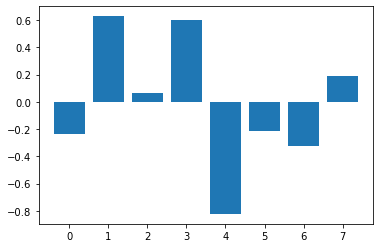

In [74]:
#Feature Importance Graphs
importance = best_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


In [77]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_trains, y_trains], axis=1)
data_test=pd.concat([X_tests,y_tests],axis=1)
data_train.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,vote
991,-1.289110,2,4,1,4,11,2,0,0
1274,-0.906986,4,3,4,4,6,0,1,1
649,0.430445,4,3,4,4,7,2,0,0
677,-0.461176,3,3,4,2,11,0,1,1
538,-0.652238,5,3,4,2,8,0,1,1


In [78]:
first converted to numeric using encoding
import statsmodels.api as sm 

In [79]:
log_reg = sm.Logit(y_trains, X_trains).fit()

Optimization terminated successfully.
         Current function value: 0.375952
         Iterations 7


In [80]:
print(log_reg.summary()) 

                           Logit Regression Results                           
Dep. Variable:                   vote   No. Observations:                 1061
Model:                          Logit   Df Residuals:                     1053
Method:                           MLE   Df Model:                            7
Date:                Thu, 08 Apr 2021   Pseudo R-squ.:                  0.3750
Time:                        12:31:24   Log-Likelihood:                -398.89
converged:                       True   LL-Null:                       -638.26
Covariance Type:            nonrobust   LLR p-value:                 2.950e-99
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                        -0.2438      0.091     -2.674      0.007      -0.422      -0.065
economic.cond.national      0.7495      0.107      6.987      0.000       0.539       0.960


In [235]:
clf = LinearDiscriminantAnalysis()
model_lda=clf.fit(X_trains,y_trains)

# Prediction

In [236]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train_lda = model_lda.predict(X_trains)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test_lda = model_lda.predict(X_tests)

In [248]:
ytrain_predict_problda1=model_lda.predict_proba(X_trains)
pd.DataFrame(ytrain_predict_problda1).head()

,0,1
0,0.949216,0.050784
1,0.078241,0.921759
2,0.307389,0.692611
3,0.078963,0.921037
4,0.012161,0.987839


In [249]:
ytest_predict_problda1=model_lda.predict_proba(X_tests)
pd.DataFrame(ytest_predict_problda1).head()

,0,1
0,0.462093,0.537907
1,0.133955,0.866045
2,0.006414,0.993586
3,0.861210,0.138790
4,0.056545,0.943455


In [239]:
# Accuracy - Training Data
# Training Accuracy
accuracy_lda_train= model_lda.score(X_trains, y_trains)
accuracy_lda_train


0.8341187558906692

In [240]:
accuracy_lda_test= model_lda.score(X_tests, y_tests)
accuracy_lda_test


0.8333333333333334

In [87]:
# GRIDSEARCHCV

In [214]:
grid_lda={
      'solver':['svd', 'lsqr', 'eigen'],
      
     }


In [215]:
model_lda = LinearDiscriminantAnalysis()

In [216]:
grid_search_lda = GridSearchCV(estimator = model_lda, param_grid = grid_lda, cv = 7,n_jobs=-1,scoring='accuracy')

In [217]:
grid_search_lda.fit(X_trains, y_trains)

GridSearchCV(cv=7, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd', 'lsqr', 'eigen']},
             scoring='accuracy')

In [218]:
print(grid_search_lda.best_params_,'\n')
print(grid_search_lda.best_estimator_)

{'solver': 'svd'} 

LinearDiscriminantAnalysis()


In [219]:
best_model_lda = grid_search_lda.best_estimator_

In [226]:
ytrain_predictlda = best_model_lda.predict(X_trains)
ytest_predictlda = best_model_lda.predict(X_tests)

In [ ]:
# Training Data Class Prediction with a cut-off value of 0.5
# Test Data Class Prediction with a cut-off value of 0.5

In [245]:
ytrain_predictlda

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [246]:
ytrain_predict_problda=best_model_lda.predict_proba(X_trains)
pd.DataFrame(ytrain_predict_problda).head()

,0,1
0,0.949216,0.050784
1,0.078241,0.921759
2,0.307389,0.692611
3,0.078963,0.921037
4,0.012161,0.987839


In [247]:
ytest_predict_problda=best_model_lda.predict_proba(X_tests)
pd.DataFrame(ytest_predict_problda).head()

,0,1
0,0.462093,0.537907
1,0.133955,0.866045
2,0.006414,0.993586
3,0.861210,0.138790
4,0.056545,0.943455


In [223]:
# Accuracy - Training Data
# Training Accuracy
accuracy_lda_train= best_model_lda.score(X_trains, y_trains)
accuracy_lda_train


0.8341187558906692

In [224]:
accuracy_lda_test= best_model_lda.score(X_tests, y_tests)
accuracy_lda_test


0.8333333333333334

In [99]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors = 15)
KNN_model.fit(X_trains,y_trains)

KNeighborsClassifier(n_neighbors=15)

In [100]:
KNN_model.score(X_trains,y_trains)

0.8473138548539114

In [101]:
KNN_model.score(X_tests,y_tests)

0.831140350877193

In [102]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_trains, y_trains)
    # evaluate test accuracy
    scores = knn.score(X_tests, y_tests)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.2149122807017544,
 0.1864035087719298,
 0.17763157894736847,
 0.18201754385964908,
 0.17763157894736847,
 0.17324561403508776,
 0.17324561403508776,
 0.16885964912280704,
 0.17105263157894735,
 0.16885964912280704]

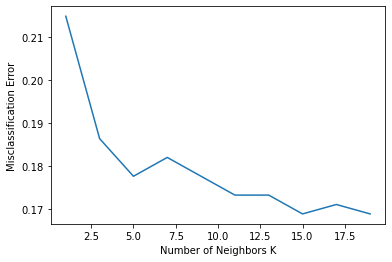

In [103]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [341]:
## Performance Matrix on train data set
y_train_predict_knn = KNN_model.predict(X_trains)
acc_train_knn = KNN_model.score(X_trains, y_trains)
print(acc_train_knn)
print(metrics.confusion_matrix(y_trains, y_train_predict_knn))
print(metrics.classification_report(y_trains, y_train_predict_knn))

0.8473138548539114
[[209  98]
 [ 64 690]]
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       307
           1       0.88      0.92      0.89       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061



In [343]:
## Performance Matrix on test data set
y_test_predict_knn = KNN_model.predict(X_tests)
acc_test_knn = KNN_model.score(X_tests, y_tests)
print(acc_test_knn)
print(metrics.confusion_matrix(y_tests, y_test_predict_knn))
print(metrics.classification_report(y_tests, y_test_predict_knn))

0.831140350877193
[[106  47]
 [ 30 273]]
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



In [268]:
ytrain_predict_prob_knn=KNN_model.predict_proba(X_trains)
pd.DataFrame(ytrain_predict_prob_knn).head()

,0,1
0,0.933333,0.066667
1,0.133333,0.866667
2,0.266667,0.733333
3,0.000000,1.000000
4,0.000000,1.000000


In [270]:
ytest_predict_prob_knn=KNN_model.predict_proba(X_tests)
pd.DataFrame(ytest_predict_prob_knn).head()

,0,1
0,0.666667,0.333333
1,0.266667,0.733333
2,0.000000,1.000000
3,0.733333,0.266667
4,0.133333,0.866667


# KNN with gridsearchcv

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
grid_knn={'n_neighbors':[ 5,7,10,15],
      'weights': ['uniform','distance'],
      'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']      
      }


In [108]:
model_knn = KNeighborsClassifier()

In [109]:
grid_search_knn = GridSearchCV(estimator = model_knn, param_grid = grid_knn,n_jobs=-1, cv = 7,scoring='accuracy')

In [110]:
grid_search_knn.fit(X_trains, y_trains)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 7, 10, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [111]:
print(grid_search_knn.best_params_,'\n')

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'uniform'} 



In [112]:
print(grid_search_knn.best_estimator_)

KNeighborsClassifier(n_neighbors=10)


In [113]:
grid_search_knn.score(X_trains,y_trains)

0.8510838831291234

In [114]:
grid_search_knn.score(X_tests,y_tests)

0.8333333333333334

In [115]:
from sklearn.naive_bayes import GaussianNB

In [116]:
NB_model = GaussianNB()
NB_model.fit(X_trains, y_trains)

GaussianNB()

In [344]:
y_train_predict_nb = NB_model.predict(X_trains)
acc_train_nb = NB_model.score(X_trains, y_trains)                      ## Accuracy
print(acc_train_nb)
print(metrics.confusion_matrix(y_trains, y_train_predict_nb))          ## confusion_matrix
print(metrics.classification_report(y_trains, y_train_predict_nb))     ## classification_report

0.8350612629594723
[[211  96]
 [ 79 675]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [345]:
## Performance Matrix on test data set
y_test_predict_nb = NB_model.predict(X_tests)
acc_test_nb = NB_model.score(X_tests, y_tests)                    ## Accuracy
print(acc_test_nb)
print(metrics.confusion_matrix(y_tests, y_test_predict_nb))         ## confusion_matrix
print(metrics.classification_report(y_tests, y_test_predict_nb))    ## classification_report

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [277]:
ytrain_predict_prob_nb=NB_model.predict_proba(X_trains)
pd.DataFrame(ytrain_predict_prob_gb).head()

,0,1
0,0.984678,0.015322
1,0.065437,0.934563
2,0.271735,0.728265
3,0.080026,0.919974
4,0.007648,0.992352


In [278]:
ytest_predict_prob_nb=NB_model.predict_proba(X_tests)
pd.DataFrame(ytest_predict_prob_gb).head()

,0,1
0,0.536792,0.463208
1,0.120285,0.879715
2,0.000332,0.999668
3,0.945240,0.054760
4,0.039267,0.960733


In [ ]:



#Accuracy score of training data:83.5%
#Accuracy score of test data:82.2%

In [119]:
model_rf=RandomForestClassifier(max_depth=4, max_features=5, min_samples_leaf=25,
                       min_samples_split=50, n_estimators=101)
model_bag=BaggingClassifier(base_estimator=model_rf,n_estimators=101,random_state=1)
model_bag.fit(X_trains, y_trains)


BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=4,
                                                        max_features=5,
                                                        min_samples_leaf=25,
                                                        min_samples_split=50,
                                                        n_estimators=101),
                  n_estimators=101, random_state=1)

In [120]:
y_train_predict_bag = model_bag.predict(X_trains)

In [121]:
y_test_predict_bag = model_bag.predict(X_tests)


In [346]:
acc_bag_train =model_bag.score(X_trains, y_trains)
acc_bag_train

0.8360037700282752

In [347]:
acc_bag_test =model_bag.score(X_tests, y_tests)
acc_bag_test

0.8223684210526315

In [288]:
ytrain_predict_prob_bag=model_bag.predict_proba(X_trains)
pd.DataFrame(ytrain_predict_prob_bag).head()

,0,1
0,0.765182,0.234818
1,0.181478,0.818522
2,0.372432,0.627568
3,0.117474,0.882526
4,0.060569,0.939431


In [297]:
ytest_predict_prob_bag=model_bag.predict_proba(X_tests)
pd.DataFrame(ytest_predict_prob_bag).head()

,0,1
0,0.442012,0.557988
1,0.197157,0.802843
2,0.023259,0.976741
3,0.710910,0.289090
4,0.320904,0.679096


In [124]:
from sklearn.ensemble import AdaBoostClassifier


ADa_model = AdaBoostClassifier(n_estimators=100,random_state=1, learning_rate=1.0, algorithm='SAMME.R')
ADa_model.fit(X_trains,y_trains)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [125]:
y_train_predict_Ada = ADa_model.predict(X_trains)

In [126]:
y_test_predict_Ada = ADa_model.predict(X_tests)


In [333]:
ADa_train =ADa_model.score(X_trains, y_trains)
ADa_train

0.8501413760603205

In [334]:
ADa_test=ADa_model.score(X_tests, y_tests)
ADa_test

0.8135964912280702

# GridSearchCV ADA boosting

In [129]:
grid_ADa={'n_estimators':[51,101,151],"learning_rate":[1.0,0.001,0.01,0.2,0.3], "algorithm":["SAMME.R"]}


In [130]:
model_ADa = AdaBoostClassifier()

In [131]:
grid_search_ADa = GridSearchCV(estimator = model_ADa, param_grid = grid_ADa, cv = 7,n_jobs=-1,scoring='accuracy')

In [132]:
grid_search_ADa.fit(X_trains, y_trains)

GridSearchCV(cv=7, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME.R'],
                         'learning_rate': [1.0, 0.001, 0.01, 0.2, 0.3],
                         'n_estimators': [51, 101, 151]},
             scoring='accuracy')

In [133]:
print(grid_search_ADa.best_params_,'\n')
print(grid_search_ADa.best_estimator_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.3, 'n_estimators': 51} 

AdaBoostClassifier(learning_rate=0.3, n_estimators=51)


In [134]:
best_model_ADa = grid_search_ADa.best_estimator_

In [135]:
ytrain_predict_ADa = best_model_ADa.predict(X_trains)
ytest_predict_ADa = best_model_ADa.predict(X_tests)

In [136]:
ytrain_predict_prob_ADa=best_model_ADa.predict_proba(X_trains)
pd.DataFrame(ytrain_predict_prob_ADa).head()

,0,1
0,0.525024,0.474976
1,0.459948,0.540052
2,0.486375,0.513625
3,0.465187,0.534813
4,0.450924,0.549076


In [137]:
ytest_predict_prob_ADa=best_model_ADa.predict_proba(X_tests)
pd.DataFrame(ytest_predict_prob_ADa).head()

,0,1
0,0.503244,0.496756
1,0.477533,0.522467
2,0.402849,0.597151
3,0.526377,0.473623
4,0.474901,0.525099


In [138]:
# Accuracy - Training Data
# Training Accuracy
accuracy_ADa_train= best_model_ADa.score(X_trains, y_trains)
accuracy_ADa_train


0.8416588124410933

In [139]:
accuracy_ADa_test= best_model_ADa.score(X_tests, y_tests)
accuracy_ADa_test


0.8201754385964912

In [299]:
ytrain_predict_prob_ada=best_model_ADa.predict_proba(X_trains)
pd.DataFrame(ytrain_predict_prob_ada).head()

,0,1
0,0.525024,0.474976
1,0.459948,0.540052
2,0.486375,0.513625
3,0.465187,0.534813
4,0.450924,0.549076


In [300]:
ytrain_predict_prob_ada=best_model_ADa.predict_proba(X_tests)
pd.DataFrame(ytrain_predict_prob_ada).head()

,0,1
0,0.503244,0.496756
1,0.477533,0.522467
2,0.402849,0.597151
3,0.526377,0.473623
4,0.474901,0.525099


In [ ]:
#Using GridsearchCV, we input various parameters like {'algorithm', 'learning_rate', 'n_estimators'}  which will helps us to find best grid for prediction of the better model
# N_estimators is the maximum number of estimators at which boosting is terminated. If a perfect fit is reached, the algo is stopped. The default here is 50.
# Learning_rate is the rate at which we are adjusting the weights of our model with respect to the loss gradient.
# The SAMME.R algorithm typically converges faster than SAMME, achieving a lower test error with fewer boosting iterations.
#bestgrid:{'algorithm': 'SAMME.R', 'learning_rate': 0.3, 'n_estimators': 51} 
#Accuracy score of training data:84.1%
#Accuracy score of test data:82.0%

# Gradient Boosting

In [140]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(criterion = 'friedman_mse',loss='exponential',max_features=5,
                                min_samples_split=50,n_estimators=101,random_state=1)
gbcl = gbcl.fit(X_trains, y_trains)

In [141]:
y_train_predict_gbcl = gbcl.predict(X_trains)

In [142]:
y_test_predict_gbcl = gbcl.predict(X_tests)


In [143]:
gbcl.score(X_trains, y_trains)

0.8803016022620169

In [144]:
gbcl.score(X_tests, y_tests)

0.8333333333333334

In [145]:
grid_gbcl={"criterion" : ['friedman_mse',"mse"],"loss":['exponential'],"max_features":[5,6,7],
                                "min_samples_split":[50,40,30],"n_estimators":[101,51]}

In [146]:
model_gbcl = GradientBoostingClassifier()

In [147]:
grid_search_gbcl = GridSearchCV(estimator = model_gbcl, param_grid = grid_gbcl, cv = 7,n_jobs=-1,scoring='accuracy')

In [148]:
grid_search_gbcl.fit(X_trains, y_trains)

GridSearchCV(cv=7, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mse'],
                         'loss': ['exponential'], 'max_features': [5, 6, 7],
                         'min_samples_split': [50, 40, 30],
                         'n_estimators': [101, 51]},
             scoring='accuracy')

In [149]:
print(grid_search_gbcl.best_params_,'\n')
print(grid_search_gbcl.best_estimator_)

{'criterion': 'friedman_mse', 'loss': 'exponential', 'max_features': 6, 'min_samples_split': 30, 'n_estimators': 51} 

GradientBoostingClassifier(loss='exponential', max_features=6,
                           min_samples_split=30, n_estimators=51)


In [150]:
best_model_gbcl = grid_search_gbcl.best_estimator_

In [151]:
ytrain_predict_gbcl = best_model_gbcl.predict(X_trains)
ytest_predict_gbcl = best_model_gbcl.predict(X_tests)

In [152]:
ytrain_predict_prob_gbcl=best_model_gbcl.predict_proba(X_trains)
pd.DataFrame(ytrain_predict_prob_gbcl).head()

,0,1
0,0.842479,0.157521
1,0.093991,0.906009
2,0.398639,0.601361
3,0.048320,0.951680
4,0.024671,0.975329


In [153]:
ytest_predict_prob_gbcl=best_model_gbcl.predict_proba(X_tests)
pd.DataFrame(ytest_predict_prob_gbcl).head()

,0,1
0,0.610818,0.389182
1,0.222798,0.777202
2,0.002342,0.997658
3,0.825742,0.174258
4,0.122592,0.877408


In [154]:
# Accuracy - Training Data
# Training Accuracy
accuracy_gbcl_train= best_model_gbcl.score(X_trains, y_trains)
accuracy_gbcl_train

0.8737040527803959

In [155]:
accuracy_gbcl_test= best_model_gbcl.score(X_tests, y_tests)
accuracy_gbcl_test


0.8333333333333334

In [ ]:
#Using GridsearchCV, we input various parameters like {'criterion', 'loss', 'max_features', 'min_samples_split', 'n_estimators}   which will helps us to find best grid for prediction of the better model
# best_params: {'criterion': 'friedman_mse', 'loss': 'exponential', 'max_features': 6, 'min_samples_split': 30, 'n_estimators': 51} 
#best_estimator:GradientBoostingClassifier(loss='exponential', max_features=6, min_samples_split=30, n_estimators=51)
#Accuracy score of training data:87.4%
#Accuracy score of test data:83.3%

In [338]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [340]:
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

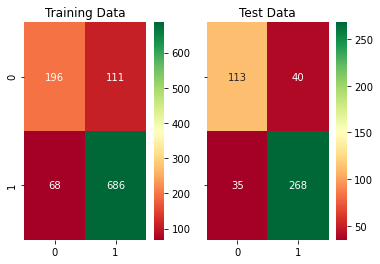

In [179]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_trains,ytrain_predictlr1)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_tests,ytest_predictlr1)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][1]);
a[0][1].set_title('Test Data');


# Classification Report of training and test data

In [180]:
print(classification_report(y_trains, ytrain_predictlr1),'\n');
print(classification_report(y_tests, ytest_predictlr1),'\n');


              precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456
 



# AUC and ROC for the training data

AUC for the Training Data: 0.890
AUC for the Test Data: 0.883


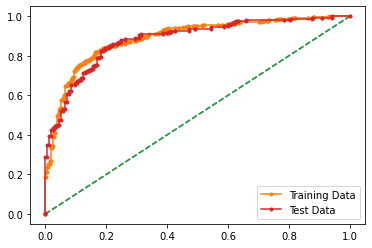

In [181]:
# AUC and ROC for the training data

# calculate AUC
train_auc_lr = metrics.roc_auc_score(y_trains,ytrain_predict_prob1[:,1])
print('AUC for the Training Data: %.3f' % train_auc_lr)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_trains,ytrain_predict_prob1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_lr = metrics.roc_auc_score(y_tests,ytest_predict_prob1[:,1])
print('AUC for the Test Data: %.3f' %test_auc_lr )

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_tests,ytest_predict_prob1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [182]:
metrics=classification_report(y_trains, ytrain_predictlr1,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_lr=round(df.loc["1"][0],2)
train_recall_lr=round(df.loc["1"][1],2)
train_f1_lr=round(df.loc["1"][2],2)
print ('LR_train_precision ',train_precision_lr)
print ('LR_train_recall ',train_recall_lr)
print ('LR_train_f1 ',train_f1_lr)


LR_train_precision  0.86
LR_train_recall  0.91
LR_train_f1  0.88


In [183]:
metrics=classification_report(y_tests, ytest_predictlr1,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_lr=round(df.loc["1"][0],2)
test_recall_lr=round(df.loc["1"][1],2)
test_f1_lr=round(df.loc["1"][2],2)
print ('LR_test_precision ',test_precision_lr)
print ('LR_test_recall ',test_recall_lr)
print ('LR_test_f1 ',test_f1_lr)


LR_test_precision  0.87
LR_test_recall  0.88
LR_test_f1  0.88


# LinearDiscriminantAnalysis

In [327]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [301]:
metrics=classification_report(y_trains,pred_class_train_lda,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_lda=round(df.loc["1"][0],2)
train_recall_lda=round(df.loc["1"][1],2)
train_f1_lda=round(df.loc["1"][2],2)
print ('LDA_train_precision ',train_precision_lda)
print ('LDA_train_recall ',train_recall_lda)
print ('LDA_train_f1 ',train_f1_lda)


LDA_train_precision  0.86
LDA_train_recall  0.91
LDA_train_f1  0.89


In [302]:
metrics=classification_report(y_tests,pred_class_test_lda,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_lda=round(df.loc["1"][0],2)
test_recall_lda=round(df.loc["1"][1],2)
test_f1_lda=round(df.loc["1"][2],2)
print ('LDA_test_precision ',test_precision_lda)
print ('LDA_test_recall ',test_recall_lda)
print ('LDA_test_f1 ',test_f1_lda)

LDA_test_precision  0.86
LDA_test_recall  0.89
LDA_test_f1  0.88


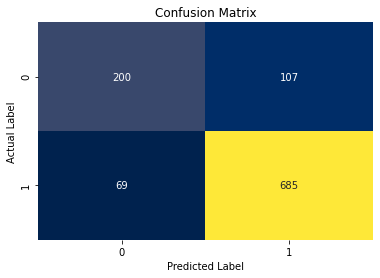

In [251]:
confusion_matrix(y_trains,pred_class_train_lda)
sns.heatmap(confusion_matrix(y_trains,pred_class_train_lda),annot=True, fmt='d',cbar=False, cmap='cividis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

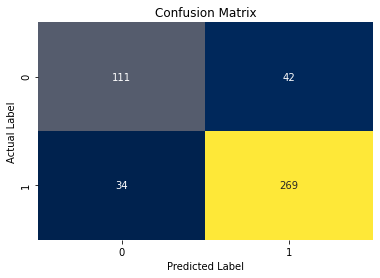

In [252]:
confusion_matrix(y_tests,pred_class_test_lda)
sns.heatmap(confusion_matrix(y_tests,pred_class_test_lda),annot=True, fmt='d',cbar=False, cmap='cividis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

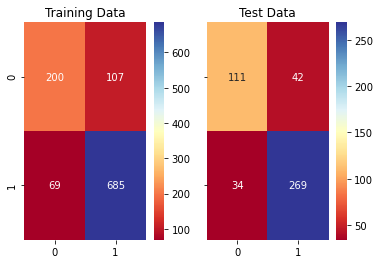

In [273]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_trains,pred_class_train_lda)),annot=True,fmt='.5g',cmap='RdYlBu',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_tests,pred_class_test_lda)),annot=True,fmt='.5g',cmap='RdYlBu',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [254]:
print(classification_report(y_trains, pred_class_train_lda),'\n');
print(classification_report(y_tests,pred_class_test_lda),'\n');


              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456
 



AUC for the Training Data: 0.889
AUC for the Test Data: 0.888


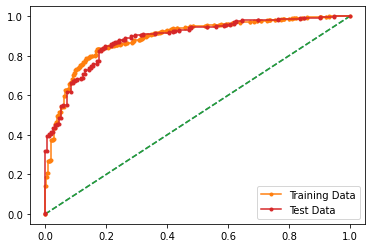

In [274]:
# AUC and ROC for the training data

# calculate AUC
train_auc_lda  = metrics.roc_auc_score(y_trains, ytrain_predict_problda[:,1])
print('AUC for the Training Data: %.3f' % train_auc_lda)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_trains, ytrain_predict_problda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_lda = metrics.roc_auc_score(y_tests,ytest_predict_problda[:,1])
print('AUC for the Test Data: %.3f' % test_auc_lda)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_tests,ytest_predict_problda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

Cart_train_AUC: 0.889


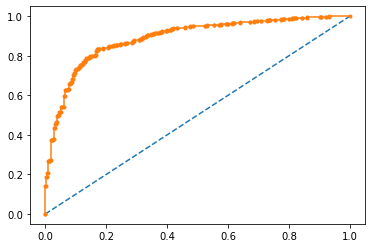

In [258]:
# predict probabilities
probs = model_lda.predict_proba(X_trains)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
Cart_train_AUC = roc_auc_score(y_trains, probs)
print('Cart_train_AUC: %.3f' % Cart_train_AUC)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_trains, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


Cart_train_AUC: 0.888


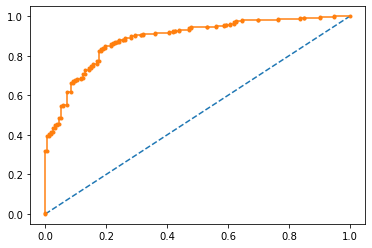

In [259]:
# predict probabilities
probs = model_lda.predict_proba(X_tests)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
Cart_train_AUC = roc_auc_score(y_tests, probs)
print('Cart_train_AUC: %.3f' % Cart_train_AUC)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_tests, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# KNN Model

In [305]:
metrics=classification_report(y_trains,y_train_predict_knn,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_knn=round(df.loc["1"][0],2)
train_recall_knn=round(df.loc["1"][1],2)
train_f1_knn=round(df.loc["1"][2],2)
print ('knn_train_precision ',train_precision_knn)
print ('knn_train_recall ',train_recall_knn)
print ('knn_train_f1 ',train_f1_knn)


knn_train_precision  0.88
knn_train_recall  0.92
knn_train_f1  0.89


In [306]:
metrics=classification_report(y_tests,y_test_predict_knn,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_knn=round(df.loc["1"][0],2)
test_recall_knn=round(df.loc["1"][1],2)
test_f1_knn=round(df.loc["1"][2],2)
print ('knn_test_precision ',test_precision_knn)
print ('knn_test_recall ',test_recall_knn)
print ('knn_test_f1 ',test_f1_knn)


knn_test_precision  0.85
knn_test_recall  0.9
knn_test_f1  0.88


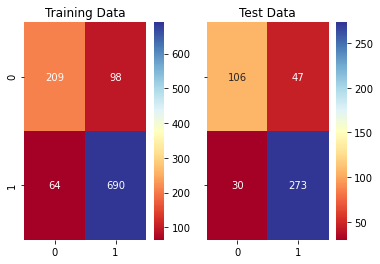

In [265]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_trains,y_train_predict_knn)),annot=True,fmt='.5g',cmap='RdYlBu',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_tests,y_test_predict_knn)),annot=True,fmt='.5g',cmap='RdYlBu',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [ ]:
# Inference:
# KNN
#Confusion matrix on the training and test data
#Trainig data:
#True Negative : 209 False Positive : 98
#False Negative : 64 True Positive : 690
#Test data:
#True Negative : 116 False Positive : 47
#False Negative : 30 True Positive : 273

In [267]:
print(classification_report(y_trains,y_train_predict_knn),'\n');
print(classification_report(y_tests,y_test_predict_knn),'\n');


              precision    recall  f1-score   support

           0       0.77      0.68      0.72       307
           1       0.88      0.92      0.89       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061
 

              precision    recall  f1-score   support

           0       0.78      0.69      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456
 



AUC for the Training Data: 0.910
AUC for the Test Data: 0.893


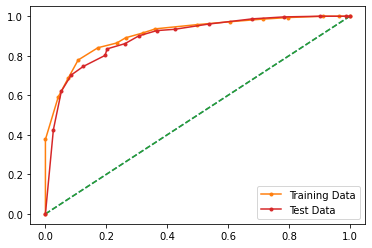

In [314]:
# AUC and ROC for the training data

# calculate AUC
train_auc_knn  = metrics.roc_auc_score(y_trains, ytrain_predict_prob_knn[:,1])
print('AUC for the Training Data: %.3f' % train_auc_knn)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_trains, ytrain_predict_prob_knn[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_knn = metrics.roc_auc_score(y_tests,ytest_predict_prob_knn[:,1])
print('AUC for the Test Data: %.3f' % test_auc_knn)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_tests,ytest_predict_prob_knn[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [ ]:
# Train Data:
### AUC: 91%
### Accuracy: 85%
### precision : 88%
#recall : 92%
#f1  :89%

# Test Data:
### AUC: 89.3%
### Accuracy: 83%
### precision :85%
#recall : 90%
#f1 : 88%

#### Training and Test set results are almost similar,This proves no overfitting or underfitting

# naive model

In [307]:
metrics=classification_report(y_trains,y_train_predict_nb,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_nb=round(df.loc["1"][0],2)
train_recall_nb=round(df.loc["1"][1],2)
train_f1_nb=round(df.loc["1"][2],2)
print ('nb_train_precision ',train_precision_nb)
print ('nb_train_recall ',train_recall_nb)
print ('nb_train_f1 ',train_f1_nb)


nb_train_precision  0.88
nb_train_recall  0.9
nb_train_f1  0.89


In [308]:
metrics=classification_report(y_tests,y_test_predict_nb,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_nb=round(df.loc["1"][0],2)
test_recall_nb=round(df.loc["1"][1],2)
test_f1_nb=round(df.loc["1"][2],2)
print ('nb_test_precision ',test_precision_nb)
print ('nb_test_recall ',test_recall_nb)
print ('nb_test_f1 ',test_f1_nb)


nb_test_precision  0.87
nb_test_recall  0.87
nb_test_f1  0.87


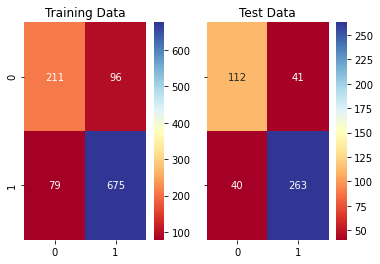

In [283]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_trains,y_train_predict_nb)),annot=True,fmt='.5g',cmap='RdYlBu',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_tests,y_test_predict_nb)),annot=True,fmt='.5g',cmap='RdYlBu',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [ ]:
# Inference:
# NB
#Confusion matrix on the training and test data
#Trainig data:
#True Negative : 211 False Positive : 96
#False Negative : 79 True Positive : 675
#Test data:
#True Negative : 112 False Positive : 41
#False Negative : 40 True Positive : 263

In [284]:
print(classification_report(y_trains,y_train_predict_nb),'\n');
print(classification_report(y_tests,y_test_predict_nb),'\n');


              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061
 

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456
 



AUC for the Training Data: 0.888
AUC for the Test Data: 0.876


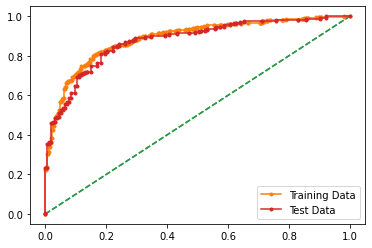

In [315]:
# AUC and ROC for the training data

# calculate AUC
train_auc_nb  = metrics.roc_auc_score(y_trains, ytrain_predict_prob_nb[:,1])
print('AUC for the Training Data: %.3f' % train_auc_nb)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_trains, ytrain_predict_prob_nb[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_nb = metrics.roc_auc_score(y_tests,ytest_predict_prob_nb[:,1])
print('AUC for the Test Data: %.3f' % test_auc_nb)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_tests,ytest_predict_prob_nb[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [ ]:
# Train Data:
### AUC: 88.8%
### Accuracy: 84%
### precision : 88%
#recall : 90%
#f1  :89%

# Test Data:
### AUC: 87.6%
### Accuracy: 82%
### precision :88%
#recall : 88%
#f1 : 88%

#### Training and Test set results are almost similar,This proves no overfitting or underfitting

# Bagging with randomforest

In [309]:
metrics=classification_report(y_trains,y_train_predict_bag,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_bag=round(df.loc["1"][0],2)
train_recall_bag=round(df.loc["1"][1],2)
train_f1_bag=round(df.loc["1"][2],2)
print ('bag_train_precision ',train_precision_bag)
print ('bag_train_recall ',train_recall_bag)
print ('bag_train_f1 ',train_f1_bag)


bag_train_precision  0.85
bag_train_recall  0.93
bag_train_f1  0.89


In [310]:
metrics=classification_report(y_tests,y_test_predict_bag,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_bag=round(df.loc["1"][0],2)
test_recall_bag=round(df.loc["1"][1],2)
test_f1_bag=round(df.loc["1"][2],2)
print ('bag_test_precision ',test_precision_bag)
print ('bag_test_recall ',test_recall_bag)
print ('bag_test_f1 ',test_f1_bag)


bag_test_precision  0.82
bag_test_recall  0.93
bag_test_f1  0.87


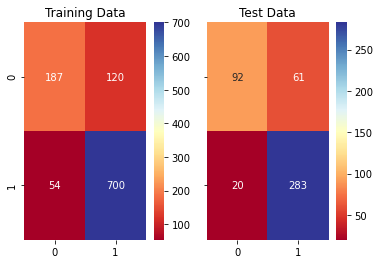

In [294]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_trains,y_train_predict_bag)),annot=True,fmt='.5g',cmap='RdYlBu',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_tests,y_test_predict_bag)),annot=True,fmt='.5g',cmap='RdYlBu',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [ ]:
# Inference:
#BAGGING 
#Confusion matrix on the training and test data
#Trainig data:
#True Negative : 187 False Positive : 120
#False Negative : 54 True Positive : 700
#Test data:
#True Negative : 92 False Positive : 61
#False Negative : 20 True Positive : 283

In [295]:
print(classification_report(y_trains,y_train_predict_bag),'\n');
print(classification_report(y_tests,y_test_predict_bag),'\n');


              precision    recall  f1-score   support

           0       0.78      0.61      0.68       307
           1       0.85      0.93      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.77      0.79      1061
weighted avg       0.83      0.84      0.83      1061
 

              precision    recall  f1-score   support

           0       0.82      0.60      0.69       153
           1       0.82      0.93      0.87       303

    accuracy                           0.82       456
   macro avg       0.82      0.77      0.78       456
weighted avg       0.82      0.82      0.81       456
 



AUC for the Training Data: 0.897
AUC for the Test Data: 0.884


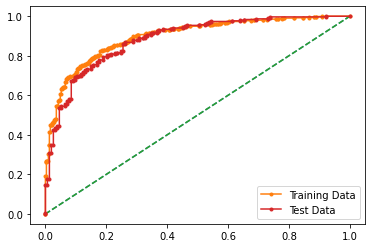

In [316]:
# AUC and ROC for the training data

# calculate AUC
train_auc_bag  = metrics.roc_auc_score(y_trains, ytrain_predict_prob_bag[:,1])
print('AUC for the Training Data: %.3f' % train_auc_bag)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_trains, ytrain_predict_prob_bag[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_bag = metrics.roc_auc_score(y_tests,ytest_predict_prob_bag[:,1])
print('AUC for the Test Data: %.3f' % test_auc_bag)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_tests,ytest_predict_prob_bag[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [ ]:
# Train Data:
### AUC: 89.7%
### Accuracy: 84%
### precision : 85%
#recall : 93%
#f1  :89%

# Test Data:
### AUC: 88.4%
### Accuracy: 82%
### precision :82%
#recall : 91%
#f1 : 87%

#### Training and Test set results are almost similar,This proves no overfitting or underfitting

# AdaBoostClassifier

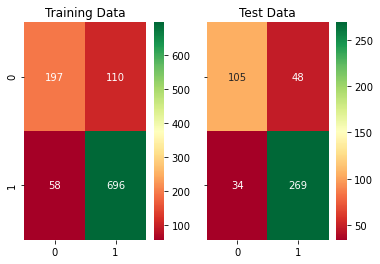

In [317]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_trains, ytrain_predict_ADa)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_tests, ytest_predict_ADa)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [ ]:
# Inference:
# ADA BOOSTING 
#Confusion matrix on the training and test data
#Trainig data:
#True Negative : 197 False Positive : 110
#False Negative : 58 True Positive : 696
#Test data:
#True Negative : 105 False Positive : 48
#False Negative : 34 True Positive : 269

In [318]:
print(classification_report(y_trains, ytrain_predict_ADa),'\n');
print(classification_report(y_tests, ytest_predict_ADa),'\n');


              precision    recall  f1-score   support

           0       0.77      0.64      0.70       307
           1       0.86      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.82      0.78      0.80      1061
weighted avg       0.84      0.84      0.84      1061
 

              precision    recall  f1-score   support

           0       0.76      0.69      0.72       153
           1       0.85      0.89      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456
 



AUC for the Training Data: 0.906
AUC for the Test Data: 0.889


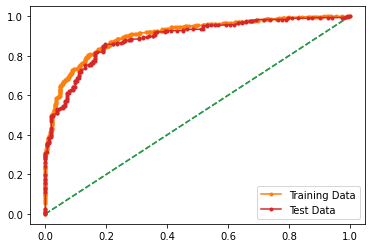

In [320]:
# AUC and ROC for the training data

# calculate AUC
train_auc_ADa = metrics.roc_auc_score(y_trains,ytrain_predict_prob_ADa[:,1])
print('AUC for the Training Data: %.3f' % train_auc_ADa)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_trains,ytrain_predict_prob_ADa[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_ADa = metrics.roc_auc_score(y_tests,ytest_predict_prob_ADa[:,1])
print('AUC for the Test Data: %.3f' %test_auc_ADa)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_tests,ytest_predict_prob_ADa[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [324]:
metrics=classification_report(y_trains, ytrain_predict_ADa,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_ADa=round(df.loc["1"][0],2)
train_recall_ADa=round(df.loc["1"][1],2)
train_f1_ADa=round(df.loc["1"][2],2)
print ('ADa_train_precision ',train_precision_ADa)
print ('ADa_train_recall ',train_recall_ADa)
print ('ADa_train_f1 ',train_f1_ADa)


ADa_train_precision  0.86
ADa_train_recall  0.92
ADa_train_f1  0.89


In [325]:
metrics=classification_report(y_tests, ytest_predict_ADa,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_ADa=round(df.loc["1"][0],2)
test_recall_ADa=round(df.loc["1"][1],2)
test_f1_ADa=round(df.loc["1"][2],2)
print ('ADa_test_precision ',test_precision_ADa)
print ('ADa_test_recall ',test_recall_ADa)
print ('ADatest_f1 ',test_f1_ADa)


ADa_test_precision  0.85
ADa_test_recall  0.89
ADatest_f1  0.87


In [ ]:
# Train Data:
### AUC: 90.6%
### Accuracy: 84%
### precision : 85%
#recall : 92%
#f1  :89%

# Test Data:
### AUC: 88.9%
### Accuracy: 82%
### precision :85%
#recall : 89%
#f1 : 87%

#### Training and Test set results are almost similar,This proves no overfitting or underfitting

# Gradient Boosting

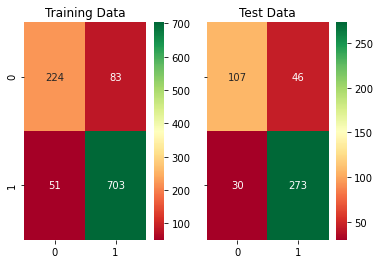

In [328]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_trains, ytrain_predict_gbcl)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_tests, ytest_predict_gbcl)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [ ]:
# Inference:
# GRADIENT BOOSTING 
#Confusion matrix on the training and test data
#Trainig data:
#True Negative : 224 False Positive : 83
#False Negative : 51 True Positive : 703
#Test data:
#True Negative : 107 False Positive : 46
#False Negative : 30 True Positive : 273

In [329]:
print(classification_report(y_trains, ytrain_predict_gbcl),'\n');
print(classification_report(y_tests, ytest_predict_gbcl),'\n');


              precision    recall  f1-score   support

           0       0.81      0.73      0.77       307
           1       0.89      0.93      0.91       754

    accuracy                           0.87      1061
   macro avg       0.85      0.83      0.84      1061
weighted avg       0.87      0.87      0.87      1061
 

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       153
           1       0.86      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



AUC for the Training Data: 0.934
AUC for the Test Data: 0.901


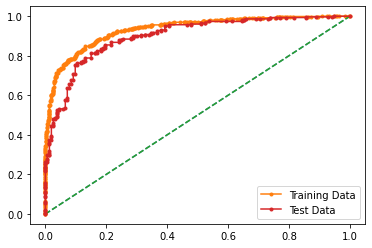

In [330]:
# AUC and ROC for the training data

# calculate AUC
train_auc_gbcl = metrics.roc_auc_score(y_trains,ytrain_predict_prob_gbcl[:,1])
print('AUC for the Training Data: %.3f' % train_auc_gbcl)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_trains,ytrain_predict_prob_gbcl[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_gbcl = metrics.roc_auc_score(y_tests,ytest_predict_prob_gbcl[:,1])
print('AUC for the Test Data: %.3f' %test_auc_gbcl)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_tests,ytest_predict_prob_gbcl[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [331]:
metrics=classification_report(y_trains, ytrain_predict_gbcl,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_gbcl=round(df.loc["1"][0],2)
train_recall_gbcl=round(df.loc["1"][1],2)
train_f1_gbcl=round(df.loc["1"][2],2)
print ('gbcl_train_precision ',train_precision_gbcl)
print ('gbcl_train_recall ',train_recall_gbcl)
print ('gbcl_train_f1 ',train_f1_gbcl)


gbcl_train_precision  0.89
gbcl_train_recall  0.93
gbcl_train_f1  0.91


In [332]:
metrics=classification_report(y_tests, ytest_predict_gbcl,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_gbcl=round(df.loc["1"][0],2)
test_recall_gbcl=round(df.loc["1"][1],2)
test_f1_gbcl=round(df.loc["1"][2],2)
print ('gbcl_test_precision ',test_precision_gbcl)
print ('gbcl_test_recall ',test_recall_gbcl)
print ('gbcl_test_f1 ',test_f1_gbcl)


gbcl_test_precision  0.86
gbcl_test_recall  0.9
gbcl_test_f1  0.88


In [ ]:
# Train Data:
### AUC: 93.4%
### Accuracy: 87%
### precision : 89%
#recall : 93%
#f1  :91%

# Test Data:
### AUC: 90.1%
### Accuracy: 83%
### precision :86%
#recall : 90%
#f1 : 88%

#### Training and Test set results are almost similar,This proves no overfitting or underfitting

In [349]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[accuracy_lr_train,train_auc_lr,train_recall_lr,train_precision_lr,train_f1_lr],
        'LR Test':[accuracy_lr_test,test_auc_lr,test_recall_lr,test_precision_lr,test_f1_lr],
        'LDA Train':[accuracy_lda_train,train_auc_lda,train_recall_lda,train_precision_lda,train_f1_lda],
        'LDA Test':[accuracy_lda_test,test_auc_lda,test_recall_lda,test_precision_lda,test_f1_lda],
        'KNN Train':[acc_train_knn,train_auc_knn,train_recall_knn,train_precision_knn,train_f1_knn],
        'KNN Test':[acc_test_knn,test_auc_knn,test_recall_knn,test_precision_knn,test_f1_knn],
        'NB Train':[acc_train_nb,train_auc_nb,train_recall_nb,train_precision_nb,train_f1_nb],
        'NB Test':[acc_test_nb,test_auc_nb,test_recall_nb,test_precision_nb,test_f1_nb],
        'BAGGING Train':[acc_bag_train ,train_auc_bag,train_recall_bag,train_precision_bag,train_f1_bag],
        'BAGGING Test':[acc_bag_test,test_auc_bag,test_recall_bag,test_precision_bag,test_f1_bag],
        'ADA Train':[accuracy_ADa_train,train_auc_ADa,train_recall_ADa,train_precision_ADa,train_f1_ADa],
        'ADA Test':[accuracy_ADa_test,test_auc_ADa,test_recall_ADa,test_precision_ADa,test_f1_ADa],
        'Gradient Train':[accuracy_gbcl_train,train_auc_gbcl,train_recall_gbcl,train_precision_gbcl,train_f1_gbcl],
        'Gradient Test':[accuracy_gbcl_train,test_auc_gbcl,test_recall_gbcl,test_precision_gbcl,test_f1_gbcl]},index=index)   
                     
round(data,2)


,LR Train,LR Test,LDA Train,LDA Test,KNN Train,KNN Test,NB Train,NB Test,BAGGING Train,BAGGING Test,ADA Train,ADA Test,Gradient Train,Gradient Test
Accuracy,0.83,0.84,0.83,0.83,0.85,0.83,0.84,0.82,0.84,0.82,0.84,0.82,0.87,0.87
AUC,0.89,0.88,0.90,0.88,0.91,0.89,0.89,0.88,0.90,0.88,0.91,0.89,0.93,0.90
Recall,0.91,0.88,0.91,0.89,0.92,0.90,0.90,0.87,0.93,0.93,0.92,0.89,0.93,0.90
Precision,0.86,0.87,0.86,0.86,0.88,0.85,0.88,0.87,0.85,0.82,0.86,0.85,0.89,0.86
F1 Score,0.88,0.88,0.89,0.88,0.89,0.88,0.89,0.87,0.89,0.87,0.89,0.87,0.91,0.88


In [ ]:
# Comparing all the model ,Gradient boosting model is best model for this dataset with accuracy of 87% in both training and test set
# AUC of Train and test in Gradient boosting model is 93% and 90% respectively
# f1 score of Train and test in Gradient boosting model is 91% and 88% respectively
# Precision  of Train and test in Gradient boosting model is 89% and 86% respectively
# Recall of Train and test in Gradient boosting model is 93% and 90% respectively

# Accuracy ,AUC,Precision,Recall for test data are almost inline with training data in Gradient boosting model.This indicates no overfitting or underfitting in the model

In [353]:
# Sample voter information
test_sample = [(4,6,10,8,20,11,7,21)]
#Create a DataFrame object
test_df = pd.DataFrame(test_sample, columns = ['age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political_knowledge', 'gender'])


In [354]:
#labour = 1 , conservative = 0

test_predict_lr =  best_model.predict(test_df)
test_predict_lda = best_model_lda.predict(test_df)
test_predict_knn = KNN_model.predict(test_df) 
test_predict_nb = NB_model.predict(test_df)
test_predict_bag = model_bag.predict(test_df)
test_predict_ada = ADa_model.predict(test_df)
test_predict_gb = best_model_ADa.predict(test_df)


In [356]:

outcome_lr = pd.DataFrame(test_predict_lr)
outcome_lr[0]=np.where(outcome_lr[0] == 1," labour party","conservative party")
outcome_lda = pd.DataFrame(test_predict_lda)
outcome_lda[0]=np.where(outcome_lda[0] == 1," labour party","conservative party")
outcome_knn = pd.DataFrame(test_predict_knn)
outcome_knn[0]=np.where(outcome_knn[0] == 1,"labour party","conservative party")
outcome_nb = pd.DataFrame(test_predict_nb)
outcome_nb[0]=np.where(outcome_nb[0] == 1,"labour party","conservative party")
outcome_bag = pd.DataFrame(test_predict_bag)
outcome_bag[0]=np.where(outcome_bag[0] == 1,"labour party","conservative party")
outcome_ada = pd.DataFrame(test_predict_ada)
outcome_ada[0]=np.where(outcome_ada[0] == 1,"labour party","conservative party")
outcome_gb = pd.DataFrame(test_predict_gb)
outcome_gb[0]=np.where(outcome_gb[0] == 1,"labour party","conservative party")


In [360]:
outcome = [outcome_lr,outcome_lda,outcome_knn,outcome_nb,outcome_bag,
               outcome_ada,outcome_gb]
outcome1 = pd.concat(outcome)
outcome1[" Prediction"] = outcome1.copy()
outcome1.drop(0,axis=1,inplace=True)
Models = ['Logistic Regression', 'Linear Discriminant Analaysis ', 'K-Nearest Neighbour',
              'Naive Bayes','Bagging(with Random Forest)', 'Adaptive Boosting ',
              'Gradient Boosting']
outcome1["Model"] = Models
outcome1.set_index("Model", inplace = True)


In [361]:
#Printing the results
print("For the sample voter details provided, the following conclusions are made by the models:\n",outcome1)


For the sample voter details provided, the following conclusions are made by the models:
                                         Prediction
Model                                             
Logistic Regression             conservative party
Linear Discriminant Analaysis   conservative party
K-Nearest Neighbour             conservative party
Naive Bayes                           labour party
Bagging(with Random Forest)           labour party
Adaptive Boosting               conservative party
Gradient Boosting               conservative party


In [362]:
outcome1

,Prediction
Model,
Logistic Regression,conservative party
Linear Discriminant Analaysis,conservative party
K-Nearest Neighbour,conservative party
Naive Bayes,labour party
Bagging(with Random Forest),labour party
Adaptive Boosting,conservative party
Gradient Boosting,conservative party


In [ ]:
# let's test the model with few test samples with variables from the dataframe
# model result:

In [1]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()


[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\sugan\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [2]:
Roosevelt_raw = inaugural.raw('1941-Roosevelt.txt')
Kennedy_raw = inaugural.raw('1961-Kennedy.txt')
Nixon_raw =inaugural.raw('1973-Nixon.txt')

In [3]:
print("The number of characters in Roosevelt speech are:",len(Roosevelt_raw))
print("The number of characters in Kennedy speech are:",len(Kennedy_raw))
print("The number of characters in Nixon speech are:",len(Nixon_raw))




The number of characters in Roosevelt speech are: 7571
The number of characters in Kennedy speech are: 7618
The number of characters in Nixon speech are: 9991


In [4]:
Roosevelt_words = inaugural.words('1941-Roosevelt.txt')
Kennedy_words = inaugural.words('1961-Kennedy.txt')
Nixon_words =inaugural.words('1973-Nixon.txt')

In [5]:
print("The number of Words in Roosevelt speech are:",len(inaugural.words('1941-Roosevelt.txt')))
print("The number of Words in Kennedy speech are:",len(inaugural.words('1961-Kennedy.txt')))
print("The number of Words in Nixon speech are:",len(inaugural.words('1973-Nixon.txt')))


The number of Words in Roosevelt speech are: 1536
The number of Words in Kennedy speech are: 1546
The number of Words in Nixon speech are: 2028


In [6]:
print("Most common words in Roosevelt speech:",nltk.FreqDist(Roosevelt_words).most_common(10))



Most common words in Roosevelt speech: [('the', 104), ('of', 81), (',', 77), ('.', 67), ('and', 44), ('to', 35), ('in', 30), ('a', 29), ('--', 25), ('is', 24)]


In [7]:
print("Most common words in Kennedy speech:",nltk.FreqDist(Kennedy_words).most_common(10))


Most common words in Kennedy speech: [(',', 85), ('the', 83), ('of', 65), ('.', 51), ('to', 38), ('and', 37), ('a', 29), ('we', 27), ('--', 25), ('in', 24)]


In [8]:
print("Most common words in Nixon speech:",nltk.FreqDist(Nixon_words).most_common(10))


Most common words in Nixon speech: [(',', 96), ('the', 80), ('.', 68), ('of', 68), ('to', 65), ('in', 54), ('and', 47), ('we', 38), ('a', 34), ('that', 32)]


In [9]:
print("The number of sentences in Roosevelt speech are:",len(inaugural.sents('1941-Roosevelt.txt')))
print("The number of sentences in Kennedy speech are:",len(inaugural.sents('1961-Kennedy.txt')))
print("The number of sentences in Nixon speech are:",len(inaugural.sents('1973-Nixon.txt')))


The number of sentences in Roosevelt speech are: 68
The number of sentences in Kennedy speech are: 52
The number of sentences in Nixon speech are: 69


# 2.2 Remove all the stopwords from all three speeches

In [10]:
import random
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
st = PorterStemmer()

import json
import re
import string
import pandas as pd


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sugan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# Roosevelt speech

In [12]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

stopwords.extend(["--"]) 
all_words = (w.lower() for w in inaugural.words('1941-Roosevelt.txt'))
all_words_clean = [word for word in all_words if word not in stopwords]

clean_stem = [st.stem(word) for word in all_words_clean]

Roosevelt_words_freq = nltk.FreqDist(clean_stem)

word_features1 = [item[0] for item in Roosevelt_words_freq.most_common(50)]

In [13]:
print("Most common words in Roosevelt speech after removing stopwords")
print(word_features1)

Most common words in Roosevelt speech after removing stopwords
['nation', 'know', 'peopl', 'spirit', 'life', 'democraci', 'us', 'america', 'live', 'year', 'human', 'freedom', 'measur', 'men', 'govern', 'new', 'bodi', 'mind', 'speak', 'day', 'state', 'american', 'must', 'someth', 'faith', 'unit', 'task', 'preserv', 'within', 'histori', 'three', 'form', 'futur', 'seem', 'hope', 'understand', 'thing', 'free', 'alon', 'still', 'everi', 'contin', 'like', 'person', 'world', 'sacr', 'word', 'came', 'land', 'first']


In [16]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(["--"]) 

all_words = (w.lower() for w in inaugural.words('1961-Kennedy.txt'))
all_words_clean = [word for word in all_words if word not in stopwords]
clean_stem = [st.stem(word) for word in all_words_clean]


kennedy_words_freq = nltk.FreqDist(clean_stem)

word_features2 = [item[0] for item in kennedy_words_freq.most_common(50)]

In [17]:
word_features2

['let',
 'us',
 'power',
 'world',
 'nation',
 'side',
 'new',
 'pledg',
 'ask',
 'citizen',
 'peac',
 'shall',
 'free',
 'final',
 'presid',
 'fellow',
 'freedom',
 'begin',
 'man',
 'hand',
 'human',
 'first',
 'gener',
 'american',
 'war',
 'alway',
 'know',
 'support',
 'unit',
 'cannot',
 'hope',
 'help',
 'weak',
 'arm',
 'countri',
 'call',
 'today',
 'well',
 'god',
 'form',
 'poverti',
 'life',
 'globe',
 'right',
 'state',
 'dare',
 'word',
 'go',
 'friend',
 'bear']

In [18]:
print("Most common words in Kennedy speech after removing stopwords")
print(word_features2)

Most common words in Kennedy speech after removing stopwords
['let', 'us', 'power', 'world', 'nation', 'side', 'new', 'pledg', 'ask', 'citizen', 'peac', 'shall', 'free', 'final', 'presid', 'fellow', 'freedom', 'begin', 'man', 'hand', 'human', 'first', 'gener', 'american', 'war', 'alway', 'know', 'support', 'unit', 'cannot', 'hope', 'help', 'weak', 'arm', 'countri', 'call', 'today', 'well', 'god', 'form', 'poverti', 'life', 'globe', 'right', 'state', 'dare', 'word', 'go', 'friend', 'bear']


In [19]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(["--"]) 

all_words = (w.lower() for w in inaugural.words('1973-Nixon.txt'))
all_words_clean = [word for word in all_words if word not in stopwords]
clean_stem = [st.stem(word) for word in all_words_clean]


Nixon_words_freq = nltk.FreqDist(clean_stem)

word_features3 = [item[0] for item in Nixon_words_freq.most_common(50)]

In [20]:
print("Most common words in Nixon speech after removing stopwords")
print(word_features3)

Most common words in Nixon speech after removing stopwords
['us', 'let', 'america', 'peac', 'world', 'respons', 'new', 'nation', 'govern', 'great', 'year', 'home', 'abroad', 'make', 'togeth', 'shall', 'time', 'polici', 'role', 'right', 'everi', 'histori', 'better', 'come', 'respect', 'peopl', 'live', 'help', 'four', 'war', 'today', 'era', 'progress', 'other', 'build', 'act', 'challeng', 'one', 'mr', 'share', 'meet', 'promis', 'long', 'work', 'preserv', 'freedom', 'place', 'system', 'god', 'way']


# 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) 

In [21]:
print("Top three words in Roosevelt's speech(after removing the stopwords):",nltk.FreqDist(Roosevelt_words_freq).most_common(3))

Top three words in Roosevelt's speech(after removing the stopwords): [('nation', 17), ('know', 10), ('peopl', 9)]


In [22]:
print("Top three words in Kennedy's speech(after removing the stopwords):",nltk.FreqDist(Kennedy_words_freq).most_common(3))

Top three words in Kennedy's speech(after removing the stopwords): [('let', 16), ('us', 12), ('power', 9)]


In [23]:
print("Top three words in Nixon's speech(after removing the stopwords):",nltk.FreqDist(Nixon_words_freq).most_common(3))

Top three words in Nixon's speech(after removing the stopwords): [('us', 26), ('let', 22), ('america', 21)]


# 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) 

In [119]:
Roosevelt_df = pd.DataFrame({"Roosevelt":[inaugural.raw('1941-Roosevelt.txt')]})
Kennedy_df =  pd.DataFrame({"Kennedy":[inaugural.raw('1961-Kennedy.txt')]})
Nixon_df =  pd.DataFrame({"Nixon":[inaugural.raw('1973-Nixon.txt')]})


In [127]:
import matplotlib.pyplot as plt

# Roosevelt speech

In [123]:
stop_words = list(stopwords.words('english'))
stop_words.extend(["--"])

In [124]:
#Removing stop words (extended list as above) from the corpus 

corpus = Roosevelt_df['Roosevelt'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 
corpus

0    On national day inauguration since 1789, peopl...
Name: Roosevelt, dtype: object

In [125]:
wc_a = ' '.join(corpus)

Word Cloud  (after cleaning)!!


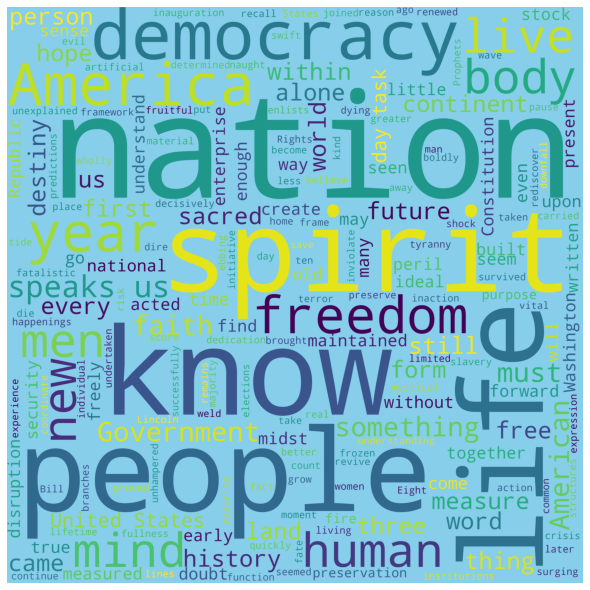

In [130]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='skyblue', 
                min_font_size = 10, random_state=100).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud  (after cleaning)!!")
plt.show()


# Kennedy speech

In [131]:
corpus2 = Kennedy_df['Kennedy'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 
corpus2

0    Vice President Johnson, Mr. Speaker, Mr. Chief...
Name: Kennedy, dtype: object

In [133]:
wc_a1 = ' '.join(corpus2)

Word Cloud  (after cleaning)!!


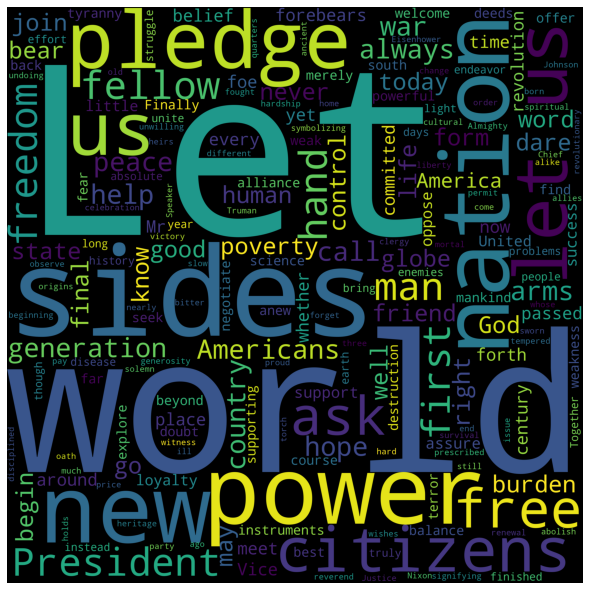

In [134]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a1) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud  (after cleaning)!!")
plt.show()


In [ ]:
# Nixon speech

In [197]:
corpus3 = Nixon_df['Nixon'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 
corpus3

0    Mr. Vice President, Mr. Speaker, Mr. Chief Jus...
Name: Nixon, dtype: object

In [198]:
wc_a3 = ' '.join(corpus3)

Word Cloud  (after cleaning)!!


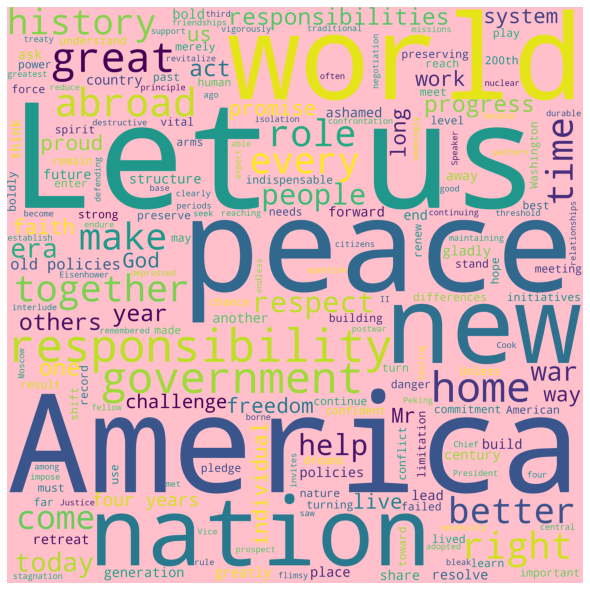

In [200]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='pink', 
                min_font_size = 10, random_state=100).generate(wc_a3) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud  (after cleaning)!!")
plt.show()
